In [1]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
vocabulary = CountVectorizer()
vocabulary.fit(simple_train)
vocabulary.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [4]:
sparse_matrix = vocabulary.transform(simple_train)

In [5]:
print(sparse_matrix)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [6]:
dense_matrix = sparse_matrix.toarray()

In [7]:
import pandas as pd
pd.DataFrame(dense_matrix, columns=vocabulary.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [8]:
simple_test = ["please don't call me"]
sparse_matrix2 = vocabulary.transform(simple_test)

In [9]:
pd.DataFrame(sparse_matrix2.toarray(), columns=vocabulary.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [10]:
sms_data = pd.read_table('sms.tsv', sep='\t', header=None, names=['label', 'message'])
sms_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sms_data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
X = sms_data.message
y = sms_data.label

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [14]:
vectorizer = CountVectorizer()

In [15]:
vectorizer.fit(X_train)
X_train_dtm = vectorizer.transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [16]:
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
from sklearn import metrics
y_predict = nb.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_predict))

0.9885139985642498


In [19]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1203    5]
 [  11  174]]


In [20]:
print(X_test[y_predict > y_test])

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object


In [21]:
print(X_test[y_predict < y_test])

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object


In [22]:
from sklearn.datasets import load_boston
boston = load_boston()
y = boston.target
boston = pd.DataFrame(boston.data)

In [23]:
boston.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [24]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


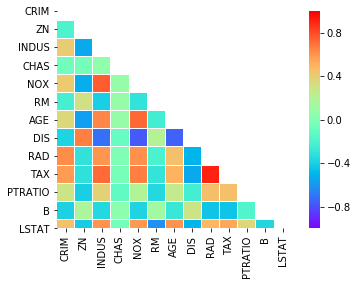

In [26]:
correlation_matrix = boston.corr()
import seaborn as sns
import numpy as np
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=correlation_matrix, linewidths=0.01, vmin=-1, vmax=1, cmap='rainbow', mask=mask, square=True)

In [27]:
X = boston_dataset.data
# X = np.delete(boston_dataset.data, 4, axis=1)
# X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)

from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_predict = lin_model.predict(X_test)
print(y_predict)

[33.10678365 28.58252332 18.2796601  21.33033178 19.25314836 20.11877707
 32.91506861 18.77726244 23.45787383 26.86101778 27.2243804  29.13605367
 20.76593683 26.89746173 23.38485345 20.84019388 17.97511077 38.57594009
 30.40232673  8.45870211 20.78284508 15.65418178 25.37037932 24.94524764
 31.36512228 10.83291721 14.39146644 16.91852702 36.38133392 15.13721399
 22.0016607  14.63417769 43.43062226 18.70381815 21.37348427 20.42065942
 18.22444898 27.65207574  9.61035704 20.16693285 23.72351214 21.73046897
 29.54952358 16.66709025 19.74656389 14.83584135 37.88842217 18.62283546
 24.82823525 20.24974686 25.47000682 24.57446949 25.36881014 25.71402032
  4.02913459 24.91821918 11.35596711 26.55497938 17.47665797 36.11456944
 20.14038193 27.51714036 17.07954903 18.66293363 10.70520678 32.31330011
 37.00552421 21.82392655 23.81925755 24.25586755 23.51427897  7.44676577
 16.67914522 21.17297812 21.07568243 21.40126484 33.45654488 27.85698451
 24.90059521 35.27655363 18.89887822 23.70826527 34

In [29]:
lin_model.coef_

array([-1.03895378e-01,  6.56815411e-02, -9.88784599e-03,  1.44988900e+00,
       -1.72371494e+01,  3.31332604e+00,  1.08945012e-02, -1.37553794e+00,
        3.23677422e-01, -1.20132483e-02, -8.20440741e-01,  8.69013924e-03,
       -5.28748376e-01])

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print('R2 score is {}'.format(r2))
print('MSE is {}'.format(mse))
print('MAE is {}'.format(mae))

R2 score is 0.7397314185094666
MSE is 22.8392870386404
MAE is 3.3374263091091296
